In [13]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
#Run this to create a new data file
data_folder = os.path.join('..', 'data')
leagues = ['E0']
file_name = "Full_prem"
start_year, end_year = 2005, 2024
util.fetch_data_into_file(data_folder=data_folder, file_name=file_name, start_year=start_year, end_year=end_year, leagues=leagues)

Data fetched and saved to ../data/Full_prem.csv


In [4]:
data = util.load_data(data_folder, file_name)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,PSH,PSD,PSA
0,E0,2020-09-12,Fulham,Arsenal,0,3,A,0,1,A,...,12,2,3,2,2,0,0,6.16,4.51,1.56
1,E0,2020-09-12,Crystal Palace,Southampton,1,0,H,1,0,H,...,11,7,3,2,1,0,0,3.32,3.29,2.40
2,E0,2020-09-12,Liverpool,Leeds,4,3,H,3,2,H,...,6,9,0,1,0,0,0,1.31,6.25,9.92
3,E0,2020-09-12,West Ham,Newcastle,0,2,A,0,0,D,...,7,8,7,2,2,0,0,2.18,3.61,3.50
4,E0,2020-09-13,West Brom,Leicester,0,3,A,0,0,D,...,9,2,5,1,1,0,0,4.00,3.59,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,E0,2022-05-22,Crystal Palace,Man United,1,0,H,1,0,H,...,22,3,6,2,4,0,0,3.15,3.79,2.24
756,E0,2022-05-22,Leicester,Southampton,4,1,H,0,0,D,...,5,3,3,0,1,0,0,1.88,4.13,3.91
757,E0,2022-05-22,Liverpool,Wolves,3,1,H,1,1,D,...,3,5,3,1,0,0,0,1.15,8.49,21.36
758,E0,2022-05-22,Man City,Aston Villa,3,2,H,0,1,A,...,11,13,1,0,1,0,0,1.15,8.74,20.27


In [5]:
data_tranformed = util.transform_dataframe_to_base_format(data)
data_tranformed

,Match index,Div,Date,Team,Opponent,Home/Away,Result,Goals scored,Goals conceded,Goal difference,Shots,Shots on Target,Percentage of shots on target,Shots against,Shots against on target,Percentage of shots against on target,Referee
0,0,E0,2020-09-12,Fulham,Arsenal,H,L,0,3,-3,5,2,40.00,13,6,46.15,C Kavanagh
1,0,E0,2020-09-12,Arsenal,Fulham,A,W,3,0,3,13,6,46.15,5,2,40.00,C Kavanagh
2,1,E0,2020-09-12,Crystal Palace,Southampton,H,W,1,0,1,5,3,60.00,9,5,55.56,J Moss
3,1,E0,2020-09-12,Southampton,Crystal Palace,A,L,0,1,-1,9,5,55.56,5,3,60.00,J Moss
4,2,E0,2020-09-12,Liverpool,Leeds,H,W,4,3,1,22,6,27.27,6,3,50.00,M Oliver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,757,E0,2022-05-22,Wolves,Liverpool,A,L,1,3,-2,7,5,71.43,29,8,27.59,A Taylor
1516,758,E0,2022-05-22,Man City,Aston Villa,H,W,3,2,1,24,5,20.83,4,2,50.00,M Oliver
1517,758,E0,2022-05-22,Aston Villa,Man City,A,L,2,3,-1,4,2,50.00,24,5,20.83,M Oliver
1518,759,E0,2022-05-22,Norwich,Tottenham,H,L,0,5,-5,9,0,0.00,19,13,68.42,C Kavanagh


In [6]:
manUtdMatches = util.get_team_matches(data_tranformed, 'Man United')
manUtdMatches['Goal difference']

20     -2
37      1
72     -5
83      3
102     0
       ..
1403   -2
1422    0
1442    3
1453   -4
1511   -1
Name: Goal difference, Length: 76, dtype: int64

In [7]:
all_teams = util.get_all_teams(data_tranformed)
all_teams

['Fulham',
 'Arsenal',
 'Crystal Palace',
 'Southampton',
 'Liverpool',
 'Leeds',
 'West Ham',
 'Newcastle',
 'West Brom',
 'Leicester',
 'Tottenham',
 'Everton',
 'Brighton',
 'Chelsea',
 'Sheffield United',
 'Wolves',
 'Man United',
 'Burnley',
 'Aston Villa',
 'Man City',
 'Brentford',
 'Watford',
 'Norwich']

range(0, 76)


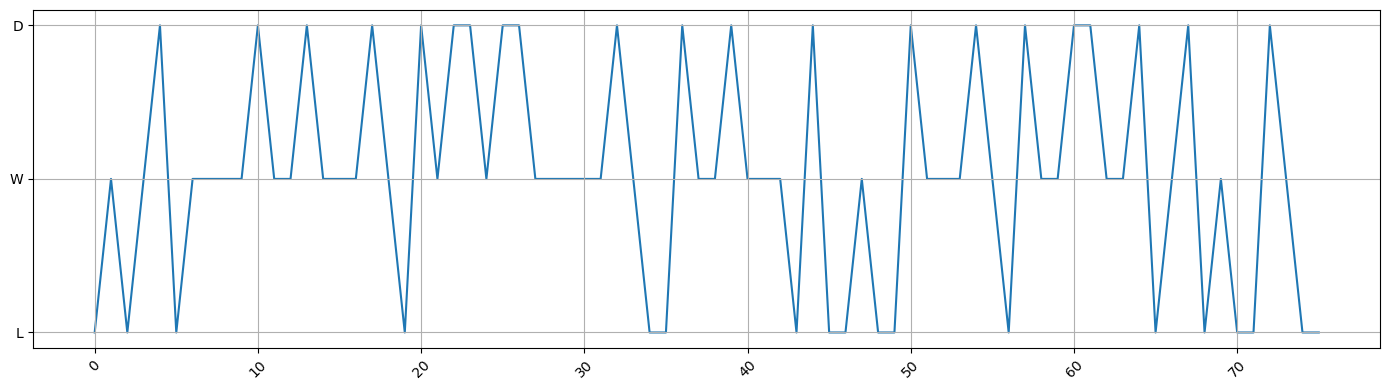

In [20]:
util.plot_series(data=manUtdMatches['Result'], x_values=[], figsize=figsize)

In [74]:
Elo = util.EloRating(1500, all_teams, draw_factor=0.25)
Elo.ratings
Elo.perform_simulations(data_tranformed)
Elo.ratings

{'Fulham': 1376.067012500429,
 'Arsenal': 1600.649409035002,
 'Crystal Palace': 1504.9448929400062,
 'Southampton': 1419.7517560780361,
 'Liverpool': 1760.3291113135517,
 'Leeds': 1464.9718212089124,
 'West Ham': 1517.5185437967625,
 'Newcastle': 1554.9079995205354,
 'West Brom': 1375.6957009030655,
 'Leicester': 1527.512566985511,
 'Tottenham': 1629.3203001212232,
 'Everton': 1448.7676921941375,
 'Brighton': 1526.2775692986709,
 'Chelsea': 1617.8357757013018,
 'Sheffield United': 1357.4085657309017,
 'Wolves': 1464.099729057892,
 'Man United': 1544.4304656136915,
 'Burnley': 1429.5917628454401,
 'Aston Villa': 1476.492105669503,
 'Man City': 1763.739734261702,
 'Brentford': 1487.2375554504706,
 'Watford': 1331.0406686345061,
 'Norwich': 1340.5605138227083}